# Zadanie Domowe

Mikołaj Krakowiak
Nr indeksu: 148076
Grupa laboratoryjna: i5.2

## Zbiór danych
Zestaw danych obejmuje wyniki trzech egzaminów oraz różnorodne czynniki osobiste, społeczne i ekonomiczne, które mają mogą mieć na nie wpływ.

Zbiór złozony jest z ośmiu kolumn. Wyróżniamy następujące kolumny:

*  gender - płeć studenta 
*  race.ethnicity - rasa studenta (A, B lub C)
*  parental.level.of.education - wykształcenie rodziców

*  lunch - poranne śniadanie
*  test.preparation.course - ukończenie testu przygotowawczego
*  math.score - wynik testu z matematyki
*  reading.score - wynik testu z czytania ze zrozumieniem
*  writing.score - wyniki testu z pisania

In [77]:
data <- read.csv("exams.csv", sep=",")

## Analiza eksploracyjna
### Początkowe 10 wierszy danych:


In [78]:
head(data, 10)

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
male,group C,some high school,standard,none,64,65,53
male,group A,some college,standard,none,71,64,61
male,group C,some high school,standard,none,53,53,45
female,group C,associate's degree,standard,none,95,100,97
female,group A,bachelor's degree,free/reduced,completed,72,91,88
female,group C,bachelor's degree,free/reduced,none,75,78,77
male,group D,some college,free/reduced,completed,72,76,74
female,group C,high school,free/reduced,none,64,70,69
male,group D,some college,standard,none,60,65,57
male,group C,bachelor's degree,standard,completed,66,65,64


In [79]:
message("Liczba obserwacji: ", nrow(data))
message("Liczba cech: ", ncol(data))

Liczba obserwacji: 1000
Liczba cech: 8


### Statystyki opisowe wyników poszczególnych egzaminów:

In [80]:
matematyka <- data$math.score
czytanie <- data$reading.score
pisanie <- data$writing.score

message("Statystki opisowe wyników testów z matemtyki:") 
summary(matematyka)
message("Statystyki opisowe wyników testów z czytania ze zrozumieniem:") 
summary(czytanie)
message("Statystyki opisowe wyników testów z pisania:")
summary(pisanie)

Statystki opisowe wyników testów z matemtyki:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   57.00   68.00   67.18   78.00  100.00 

Statystyki opisowe wyników testów z czytania ze zrozumieniem:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.00   60.00   70.00   70.09   80.00  100.00 

Statystyki opisowe wyników testów z pisania:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   59.00   69.00   69.06   79.00  100.00 

### Histogramy wników z poszczególnych egzaminów

Szereg rozdzielczy przedstawiający wyniki testów z matematyki:



  [15,20.5) [20.5,26.1) [26.1,31.6) [31.6,37.2) [37.2,42.7) [42.7,48.3) 
          1           5           5          14          32          43 
[48.3,53.8) [53.8,59.4) [59.4,64.9) [64.9,70.4)   [70.4,76)   [76,81.5) 
         89         115         121         144         132         122 
[81.5,87.1) [87.1,92.6) [92.6,98.2) 
         83          54          30 

Szereg rozdzielczy przedstawiający wyniki testów z czytania ze zrozumieniem:



  [23,28.3) [28.3,33.6) [33.6,38.8) [38.8,44.1) [44.1,49.4) [49.4,54.7) 
          4           3           9          28          35          62 
  [54.7,60)   [60,65.2) [65.2,70.5) [70.5,75.8) [75.8,81.1) [81.1,86.4) 
        101         127         140         142         121          94 
[86.4,91.6) [91.6,96.9) 
         63          35 

Szereg rozdzielczy przedstawiający wyniki testów z pisania:



  [16,21.3) [21.3,26.6) [26.6,31.8) [31.8,37.1) [37.1,42.4) [42.4,47.7) 
          2           1           6          14          21          41 
  [47.7,53)   [53,58.2) [58.2,63.5) [63.5,68.8) [68.8,74.1) [74.1,79.4) 
         47         103         122         122         154         118 
[79.4,84.6) [84.6,89.9) [89.9,95.2) 
         82          77          50 

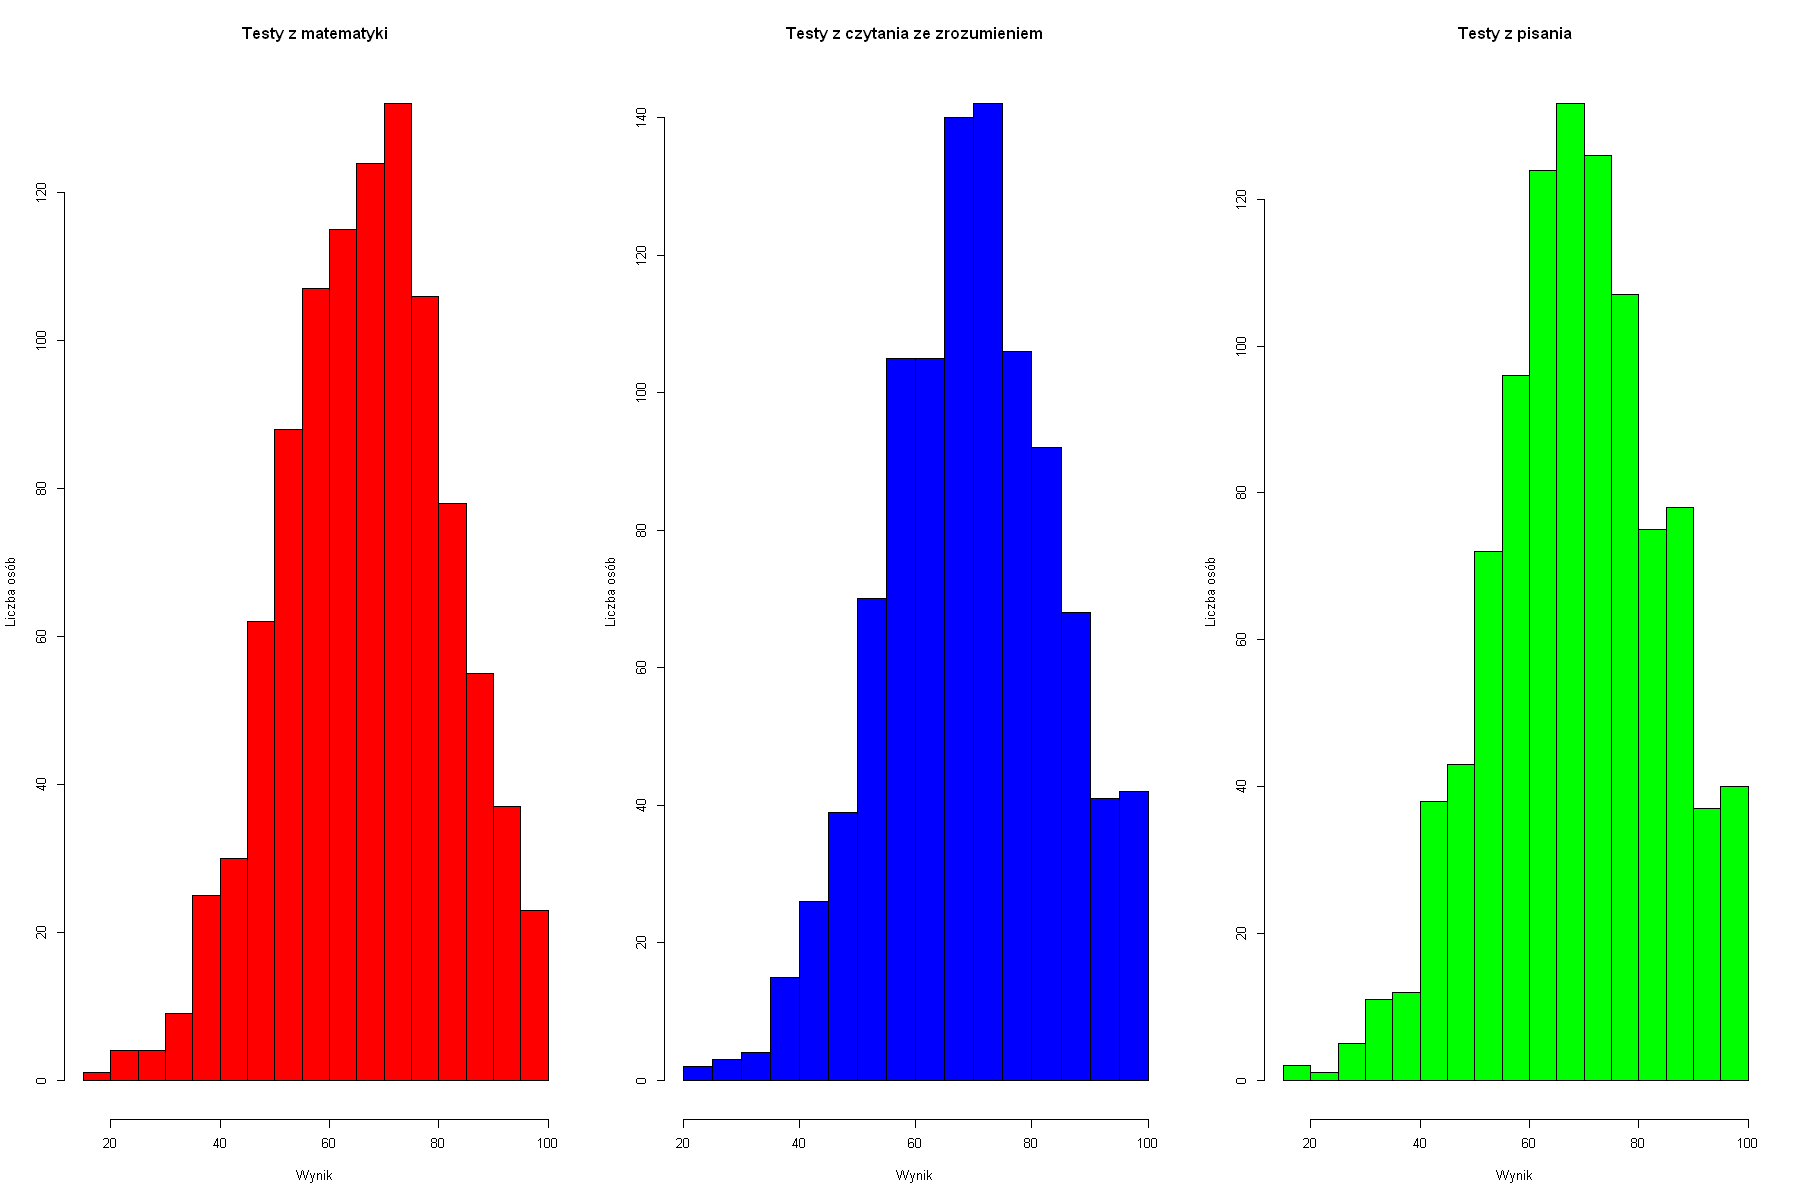

In [81]:
layout(matrix(c(1,2,3), 1, 3, byrow=TRUE))

mat_rozstep <- max(matematyka) - min(matematyka)
mat_k <- mat_rozstep / (IQR(matematyka) * 2.64 * length(matematyka)^(-1/3))
mat_szer <- mat_rozstep / mat_k

mat_breaks <- seq(min(matematyka), max(matematyka), mat_szer)

options(repr.plot.width = 15, repr.plot.height = 10)
mathist <- hist(matematyka, col="red", main="Testy z matematyki", xlab="Wynik", ylab="Liczba osób",breaks=mat_k)

message("Szereg rozdzielczy przedstawiający wyniki testów z matematyki:")
table(cut(matematyka, mat_breaks, right = FALSE))



czyt_rozstep <- max(czytanie) - min(czytanie)
czyt_k <- czyt_rozstep / (IQR(czytanie) * 2.64 * length(czytanie)^(-1/3))
czyt_szer <- czyt_rozstep / czyt_k

czyt_breaks <- seq(min(czytanie), max(czytanie), czyt_szer)

options(repr.plot.width = 15, repr.plot.height = 10)
czythist <- hist(czytanie, col="blue", main="Testy z czytania ze zrozumieniem", xlab="Wynik", ylab="Liczba osób", breaks=czyt_k)

message("Szereg rozdzielczy przedstawiający wyniki testów z czytania ze zrozumieniem:")
table(cut(czytanie, czyt_breaks, right = FALSE))



pis_rozstep <- max(pisanie) - min(pisanie)
pis_k <- pis_rozstep / (IQR(pisanie) * 2.64 * length(pisanie)^(-1/3))
pis_szer <- pis_rozstep / pis_k

pis_breaks <- seq(min(pisanie), max(pisanie), pis_szer)

options(repr.plot.width = 15, repr.plot.height = 10)
pishist <- hist(pisanie, col="green", main="Testy z pisania", xlab="Wynik", ylab="Liczba osób", breaks=pis_k)

message("Szereg rozdzielczy przedstawiający wyniki testów z pisania:")
table(cut(pisanie, pis_breaks, right = FALSE))


Rozkłady są w przybliżeniu rozkładami normalnymi. Wyniki z testów czytania ze zrozumieniem i testów z pisania są do siebie dosyć zbliżone, może to być spowodowane humanistycznym aspektem obu przedmiotów. W kolejnych punktach postaram się sprawdzić czy istnieję zależność pomiędzy wnikami wymieniony powyżej dwóch testów.

## Testy
### Wyznacznie korelacji oraz kowariancji oraz testowanie istotności statystycznej korelacji

Zbadajmy czy za pomocą próby 1000 studentów (rozmiar analizowanych danych) możemy podjąć decyzję o istotności współczynnika korelacji wobec całej populacji studentów.

Hipoteza zerowa H0: p=0

Hipoteza alternatywna H1: p1 != 0

Zastosujemy statystykę testową t.

Wartość kowariancji: 210.754852852853
Wartość korelacji: 0.955432846733313


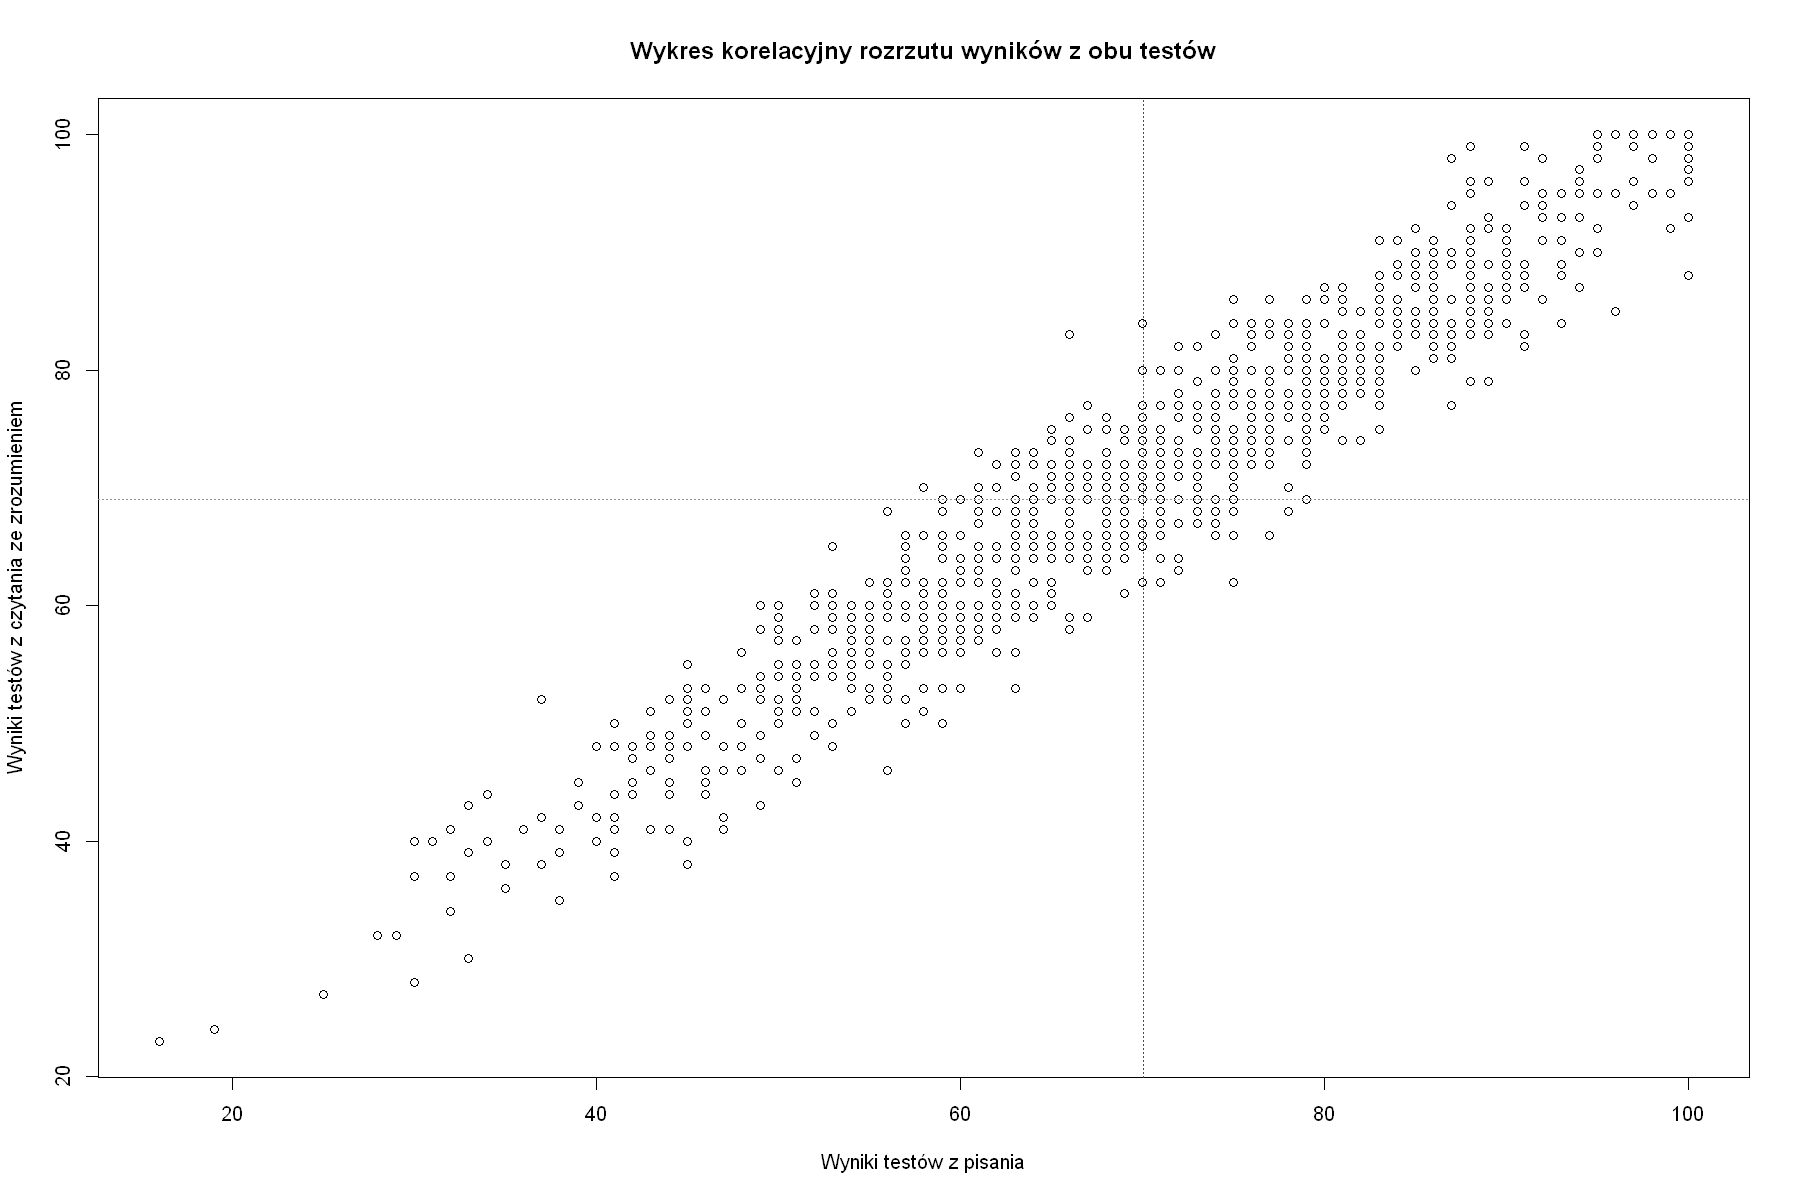

In [91]:
sred_czyt <- mean(czytanie)
sred_pis <- mean(pisanie)

my_cov <- sum((czytanie - sred_czyt)*(pisanie-sred_pis)) / (length(czytanie)-1)
message("Wartość kowariancji: ", my_cov)

my_cor <- my_cov / (sd(czytanie)*sd(pisanie))
message("Wartość korelacji: ", my_cor)

plot(czytanie~pisanie, ylab="Wyniki testów z czytania ze zrozumieniem", xlab="Wyniki testów z pisania", main="Wykres korelacyjny rozrzutu wyników z obu testów")
abline(v = mean(czytanie), col="red", lty=3)
abline(h = mean(pisanie), col="green", lty=3)

Aby zweryfikować hipotezę mówiącą, że współczynnik korelacji jest niezerowy (test dwustronny), obliczam wartość statystyki $t=\frac{r}{\sqrt{1-r^2}}\cdot \sqrt{n-2}$, gdzie $r$ to współczynnik korelacji dla próby.

In [83]:
t <- my_cor/sqrt(1-my_cor^2)*sqrt(length(czytanie)-2)
message("Wartość statystki t: ", t)

Wartość statystki t: 102.243695491021


Obliczam p-wartość dla wyznaczonej statystyki pamiętając, że mam do czynienia z testem dwustronnym. Zakładam poziom istotności równy 0.05

In [84]:
pval <- pt(t, lower.tail = F, df= length(czytanie) - 2)*2
message("Wartość p-value: ", pval)

Wartość p-value: 0


Wartość p_value jest mniejsza od zaproponowanego przeze mnie poziomu istotności alfa = 0.05. Możemy więc <b>odrzucić hipotezę zerową H0</b> na rzecz hipotezy alterantywnej więc współczynnik korelacji jest istotny statystycznie. 

Na wykresie wyżej możemy zauważyć że istnieję zależność pomiędzy wynikami z obu przedstawionych testów. Widzimy że współzależnośc zmiennych jest pozytywana (dodatnia). Współczynnik korelacji dla powyższych danych wyniosł <b>r = 0.955432846733313</b> co jest równoznaczne z tym że możemy uznać korelację za prawie pełną. Spróbujmy więc zbudować model regresji liniowej który w przyszłości pozwoli nam przewidzieć wyniki testów z pisania przy pomocy wyników z testów czytania ze zrozumieniem.

### Regresja liniowa


Call:
lm(formula = czytanie ~ pisanie)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5111  -2.9147  -0.0361   2.8375  15.7046 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.047033   0.631290   11.16   <2e-16 ***
pisanie     0.912854   0.008928  102.24   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.288 on 998 degrees of freedom
Multiple R-squared:  0.9129,	Adjusted R-squared:  0.9128 
F-statistic: 1.045e+04 on 1 and 998 DF,  p-value: < 2.2e-16


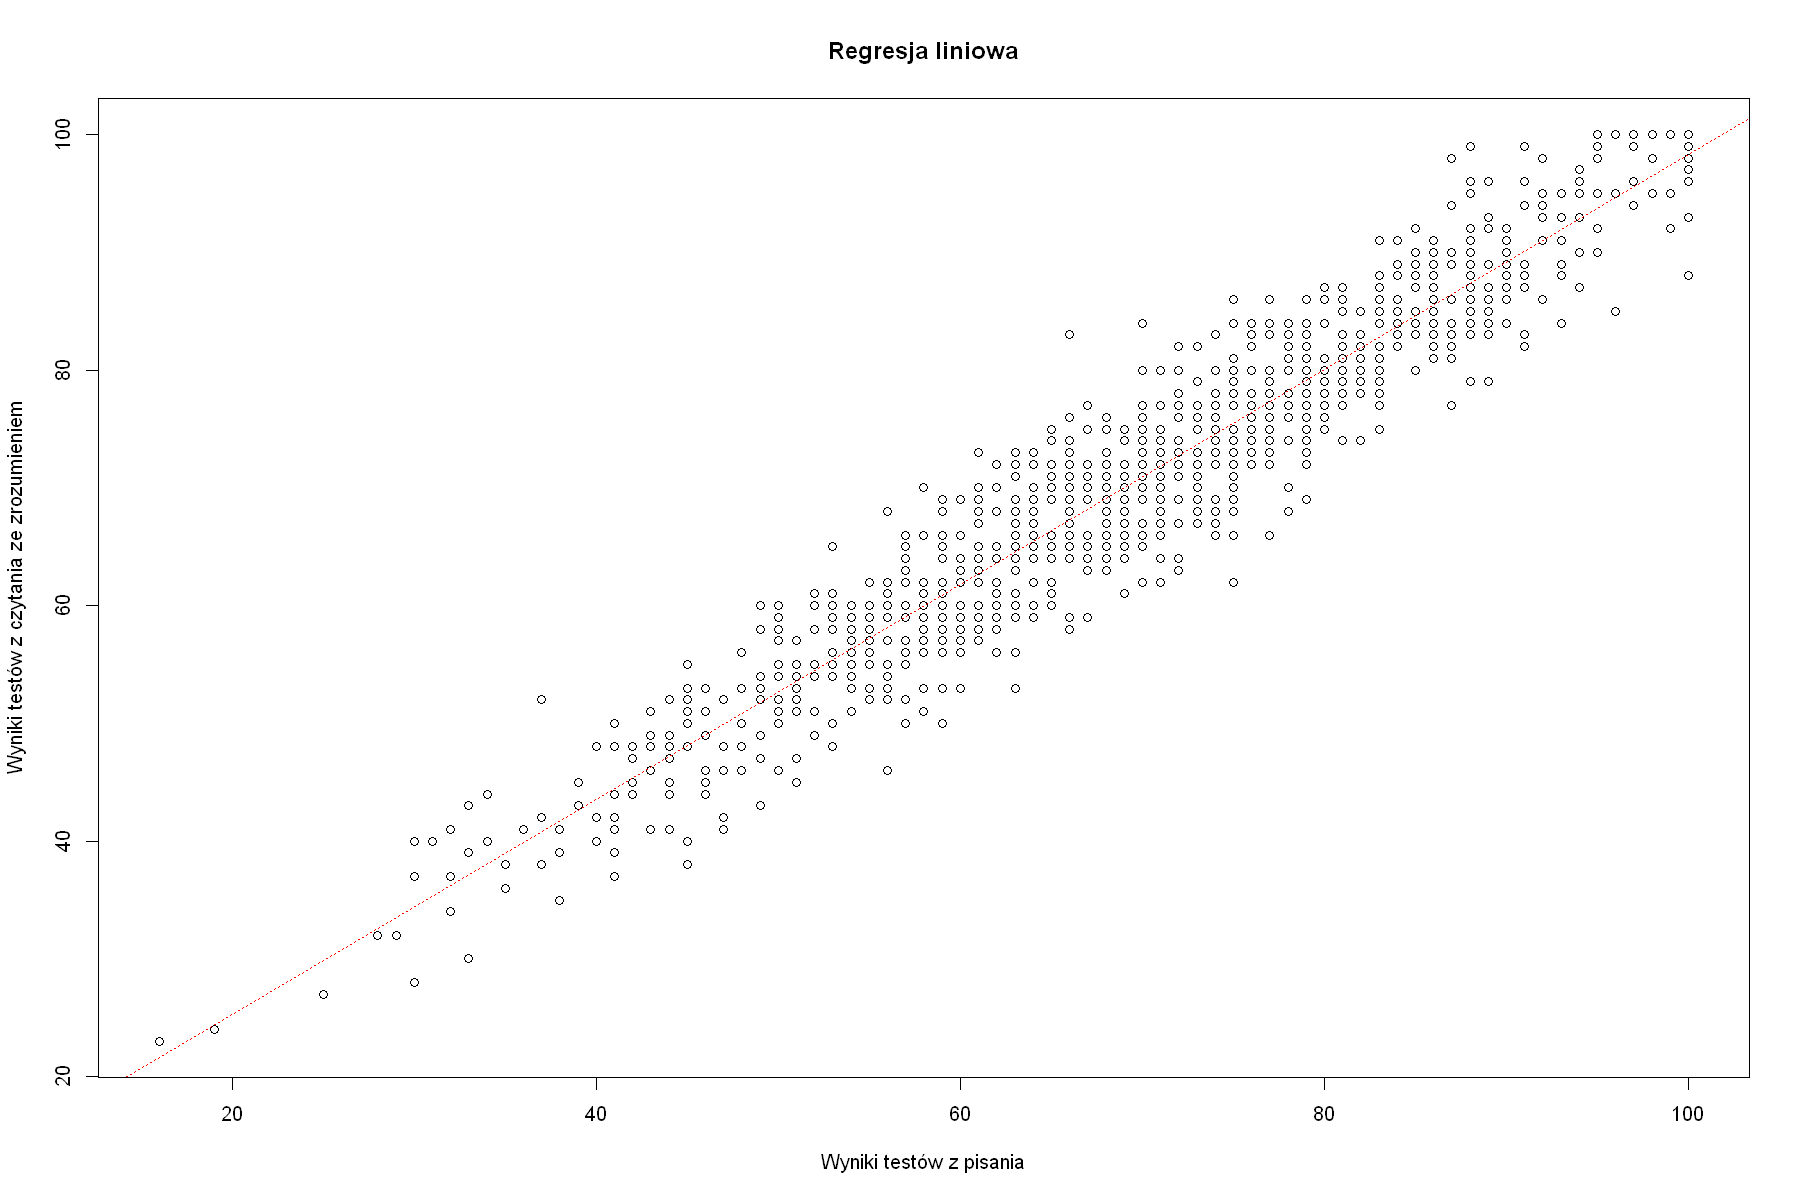

In [92]:
model2 <- lm(czytanie~pisanie)
summary(model2)

plot(czytanie ~ pisanie, ylab="Wyniki testów z czytania ze zrozumieniem", xlab="Wyniki testów z pisania", main="Regresja liniowa")
abline(model2, col='red', lty=3)

## Podsumowanie

Przeprowadzony test udowodnił że istnieję silna zależność pomiędzy wynikami testów z przedmiotów humanistycznych jednak nie powinno się na tym poprzestawać. W celu lepszego zrozumienia zbioru danych wymagane byłoby przeprowadzenie badań kolejnych czynników które mogłyby mieć wpływ na wyniki egzaminów (przykładowo uczestnictwo w kursach przygotowawczych prawdopodobnie ma znaczący wpływ na wyniki), w tym celu należałoby wykonać przykładowo regresję wielu zmiennych (wieloraką).

Opracował MIkołaj Krakowiak 148076